# Import librairies

In [3]:
import pandas as pd, numpy as np, os, warnings, seaborn as sns
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font1 = fm.FontProperties(size=20)
font2 = fm.FontProperties(size=24)

%matplotlib inline

if int(str(sns.__version__).split('.')[1]) > 8 : 
    plt.style.use('seaborn-v0_8-darkgrid')
else:
    plt.style.use('seaborn-darkgrid')
    
sns.set(font_scale=2)
warnings.filterwarnings(action="ignore")

# Outils

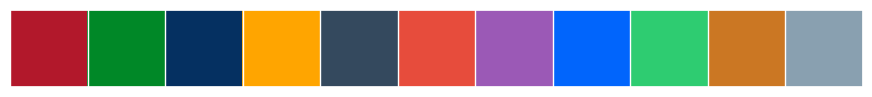

In [4]:
palette = [ "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973",
            "#f5054f", 
            "#030aa7", "#e50000", "#d8863b", "#005f6a", "#6b7c85", "#751973", "#d1e5f0", "#fddbc7",
            "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#f5054f", "#a0450e",
            "#0339f8", "#f4320c", "#fec615", "#017a79", "#85a3b2", "#fe2f4a", "#a00498", "#b04e0f",
            "#0165fc", "#ff724c", "#fddc5c", "#11875d", "#89a0b0", "#fe828c", "#cb00f5", "#b75203",
            "#0485d1", "#ff7855", "#fbeeac", "#0cb577", "#95a3a6", "#ffb7ce", "#c071fe", "#ca6b02",
            "#92c5de", "#f4a582", "#fef69e", "#18d17b", "#c5c9c7", "#ffcfdc", "#caa0ff", "#cb7723",
            "#d1e5f0", "#fddbc7", "#ffffcb", "#12e193", "#d8dcd6", "#ffdaf0", "#dfc5fe", "#d8863b",
            "#030764", "#be0119", "#dbb40c", "#005249", "#3c4142", "#cb0162", "#5d1451", "#653700",
            "#040348", "#67001f", "#b27a01", "#002d04", "#000000", "#a0025c", "#490648", "#3c0008"
          ]
palette = ['#b2182b','#008827','#053061','#ffa500', '#34495e', '#e74c3c', 
          '#9b59b6', '#0165fc','#2ecc71', '#cb7723', '#89a0b0']
sns.palplot(sns.color_palette(palette))

In [5]:
donnees = pd.read_csv('../donnees/meteo/2017/synop.201701.csv',sep=';',usecols=['numer_sta','date','dd','ff','t','u','vv',
                                                        'pres','rr1','rr3','rr6','rr12','rr24'],na_values='mq')

In [6]:
donnees.head()

,numer_sta,date,dd,ff,t,u,vv,pres,rr1,rr3,rr6,rr12,rr24
0,7005,20170101000000,0.0,0.0,269.25,96.0,1740.0,101800.0,0.0,0.0,0.0,0.0,0.2
1,7015,20170101000000,0.0,0.0,270.05,98.0,520.0,102090.0,0.0,0.0,0.0,0.0,0.0
2,7020,20170101000000,260.0,7.0,281.55,79.0,15000.0,102340.0,0.0,0.0,0.0,0.0,0.0
3,7027,20170101000000,0.0,0.0,268.15,98.0,180.0,101880.0,0.0,0.0,0.0,0.0,0.0
4,7037,20170101000000,0.0,0.0,268.65,93.0,130.0,100870.0,0.0,0.0,0.0,0.0,0.0


In [7]:
donnees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14344 entries, 0 to 14343
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   numer_sta  14344 non-null  int64  
 1   date       14344 non-null  int64  
 2   dd         14292 non-null  float64
 3   ff         14292 non-null  float64
 4   t          14316 non-null  float64
 5   u          14322 non-null  float64
 6   vv         11491 non-null  float64
 7   pres       14337 non-null  float64
 8   rr1        13682 non-null  float64
 9   rr3        13900 non-null  float64
 10  rr6        13281 non-null  float64
 11  rr12       13080 non-null  float64
 12  rr24       12869 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 1.4 MB


In [8]:
donnees.isna()

,numer_sta,date,dd,ff,t,u,vv,pres,rr1,rr3,rr6,rr12,rr24
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14339,False,False,False,False,False,False,False,False,False,False,False,False,False
14340,False,False,False,False,False,False,True,False,False,False,False,False,False
14341,False,False,False,False,False,False,False,False,False,False,False,False,False
14342,False,False,False,False,False,False,True,False,False,False,False,False,False


In [9]:
donnees.isna().sum()

numer_sta       0
date            0
dd             52
ff             52
t              28
u              22
vv           2853
pres            7
rr1           662
rr3           444
rr6          1063
rr12         1264
rr24         1475
dtype: int64

In [10]:
donnees['Precipitation'] =  donnees['rr3'].combine_first(donnees['rr6']/2)\
                                          .combine_first(donnees['rr12']/4)\
                                          .combine_first(donnees['rr24']/8)\
                                          .combine_first(donnees['rr1']*3)

In [11]:
donnees.isna().sum()

numer_sta           0
date                0
dd                 52
ff                 52
t                  28
u                  22
vv               2853
pres                7
rr1               662
rr3               444
rr6              1063
rr12             1264
rr24             1475
Precipitation     263
dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


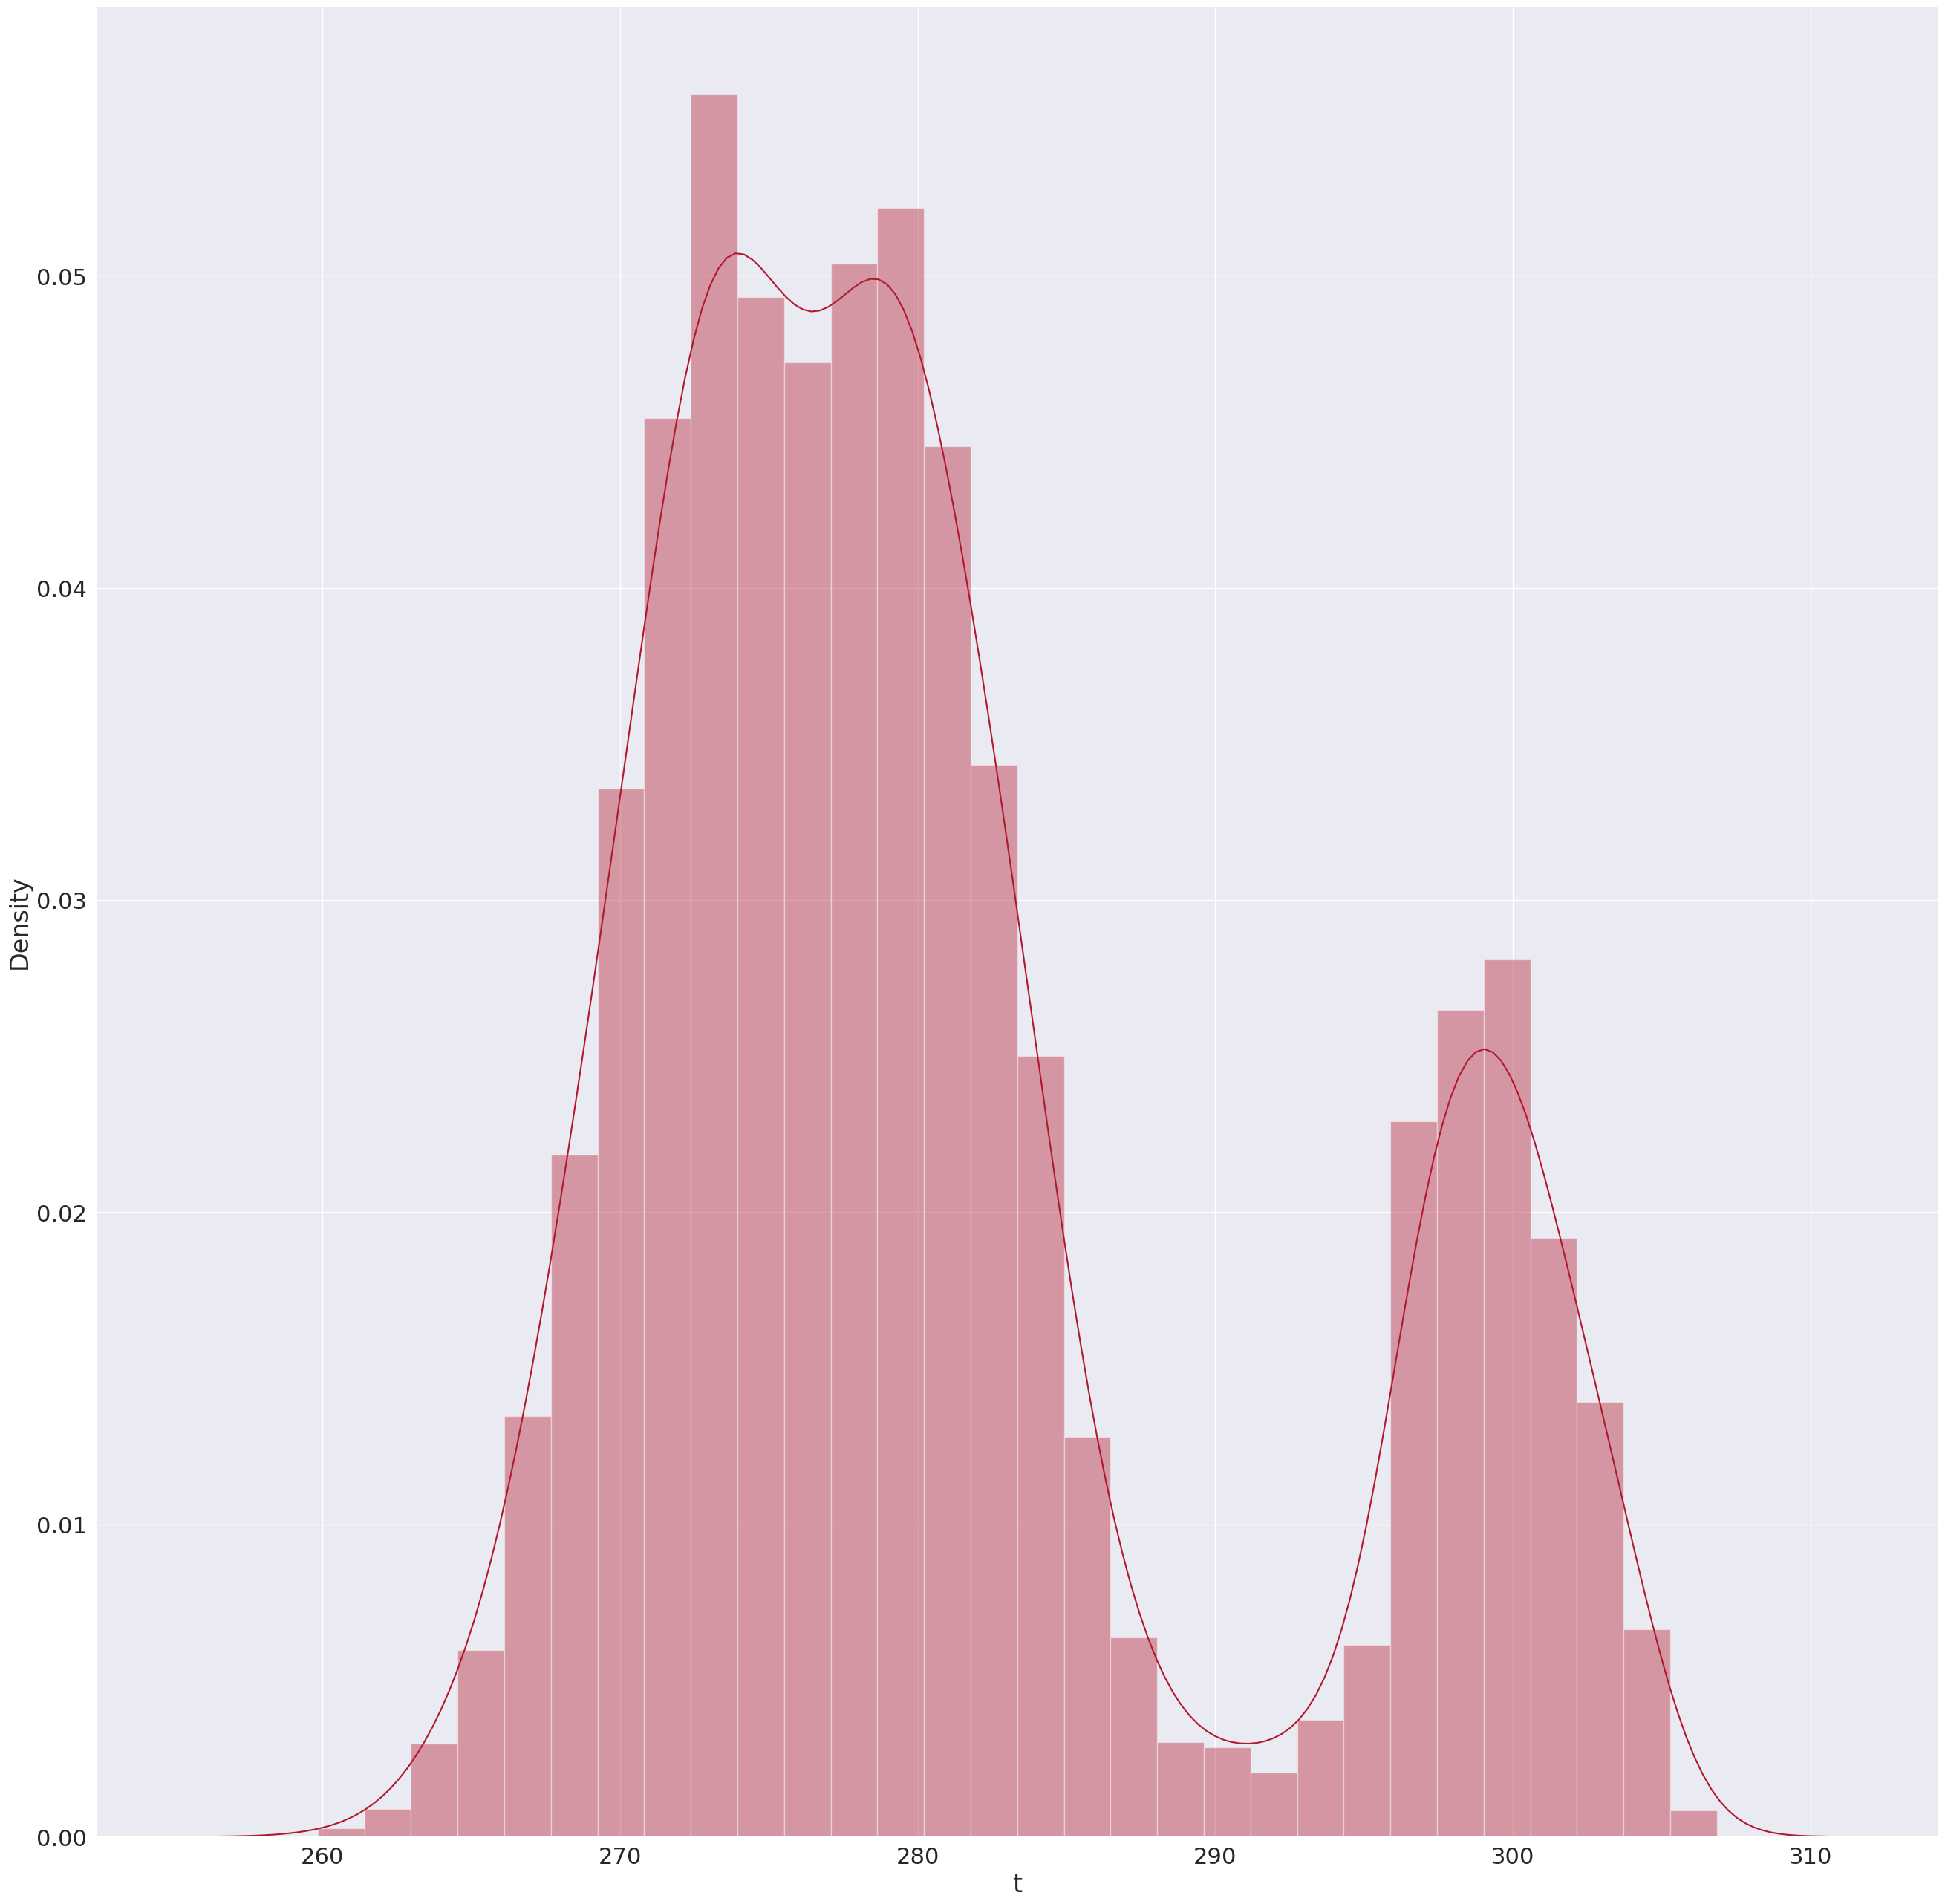

In [12]:
plt.figure(figsize=(32,32))
sns.distplot(donnees['t'],color=palette[0], hist_kws=dict(alpha=0.4),bins=30)
plt.legend();

In [14]:
donnees['t'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
14339    False
14340    False
14341    False
14342    False
14343    False
Name: t, Length: 14344, dtype: bool

In [13]:
donnees[donnees['t'].isna()]

,numer_sta,date,dd,ff,t,u,vv,pres,rr1,rr3,rr6,rr12,rr24,Precipitation
852,81415,20170102180000,30.0,2.4,NaN,92.0,NaN,99930.0,11.2,13.8,13.8,NaN,NaN,13.800
1255,81415,20170103150000,50.0,3.1,NaN,73.0,NaN,100070.0,0.0,0.0,0.0,0.0,23.8,0.000
2689,7630,20170106180000,NaN,NaN,NaN,NaN,13370.0,101450.0,NaN,NaN,NaN,NaN,NaN,NaN
2921,7630,20170107060000,NaN,NaN,NaN,NaN,7180.0,101490.0,NaN,NaN,NaN,NaN,0.2,0.025
3037,7630,20170107120000,NaN,NaN,NaN,NaN,14340.0,101500.0,NaN,NaN,NaN,NaN,0.0,0.000
3900,7577,20170109090000,30.0,9.3,NaN,76.0,19240.0,101880.0,NaN,NaN,NaN,NaN,NaN,NaN
4098,81415,20170109180000,50.0,1.0,NaN,51.0,NaN,99830.0,0.0,0.0,0.0,0.0,0.0,0.000
4155,81415,20170109210000,210.0,0.5,NaN,82.0,NaN,99750.0,0.0,0.2,0.2,0.2,0.2,0.200
4213,81415,20170110000000,80.0,0.9,NaN,89.0,NaN,99940.0,0.0,0.0,0.2,0.2,0.2,0.000
4447,81415,20170110120000,70.0,1.8,NaN,83.0,NaN,100080.0,0.0,0.0,0.0,0.0,0.2,0.000


In [15]:
donnees = pd.read_csv('../donnees/meteo/2017/synop.201701.csv',sep=';',na_values='mq')

In [16]:
donnees.head()

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,Unnamed: 59
0,7005,20170101000000,102730.0,-190.0,8.0,0.0,0.0,269.25,268.75,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7015,20170101000000,102700.0,-220.0,7.0,0.0,0.0,270.05,269.75,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7020,20170101000000,102610.0,-240.0,6.0,260.0,7.0,281.55,278.15,79.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7027,20170101000000,102750.0,-210.0,8.0,0.0,0.0,268.15,267.85,98.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7037,20170101000000,102830.0,-190.0,7.0,0.0,0.0,268.65,267.65,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
donnees.columns

Index(['numer_sta', 'date', 'pmer', 'tend', 'cod_tend', 'dd', 'ff', 't', 'td',
       'u', 'vv', 'ww', 'w1', 'w2', 'n', 'nbas', 'hbas', 'cl', 'cm', 'ch',
       'pres', 'niv_bar', 'geop', 'tend24', 'tn12', 'tn24', 'tx12', 'tx24',
       'tminsol', 'sw', 'tw', 'raf10', 'rafper', 'per', 'etat_sol', 'ht_neige',
       'ssfrai', 'perssfrai', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24', 'phenspe1',
       'phenspe2', 'phenspe3', 'phenspe4', 'nnuage1', 'ctype1', 'hnuage1',
       'nnuage2', 'ctype2', 'hnuage2', 'nnuage3', 'ctype3', 'hnuage3',
       'nnuage4', 'ctype4', 'hnuage4', 'Unnamed: 59'],
      dtype='object')

In [19]:
donnees.drop(columns=['phenspe1',
       'phenspe2', 'phenspe3', 'phenspe4', 'nnuage1', 'ctype1', 'hnuage1',
       'nnuage2', 'ctype2', 'hnuage2', 'nnuage3', 'ctype3', 'hnuage3',
       'nnuage4', 'ctype4', 'hnuage4', 'Unnamed: 59'] , inplace=True)

In [20]:
donnees.columns

Index(['numer_sta', 'date', 'pmer', 'tend', 'cod_tend', 'dd', 'ff', 't', 'td',
       'u', 'vv', 'ww', 'w1', 'w2', 'n', 'nbas', 'hbas', 'cl', 'cm', 'ch',
       'pres', 'niv_bar', 'geop', 'tend24', 'tn12', 'tn24', 'tx12', 'tx24',
       'tminsol', 'sw', 'tw', 'raf10', 'rafper', 'per', 'etat_sol', 'ht_neige',
       'ssfrai', 'perssfrai', 'rr1', 'rr3', 'rr6', 'rr12', 'rr24'],
      dtype='object')

In [22]:
donnees = donnees[~donnees['t'].isna()]

In [23]:
donnees

,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,per,etat_sol,ht_neige,ssfrai,perssfrai,rr1,rr3,rr6,rr12,rr24
0,7005,20170101000000,102730.0,-190.0,8.0,0.0,0.0,269.25,268.75,96.0,...,-10.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.2
1,7015,20170101000000,102700.0,-220.0,7.0,0.0,0.0,270.05,269.75,98.0,...,-10.0,5.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,7020,20170101000000,102610.0,-240.0,6.0,260.0,7.0,281.55,278.15,79.0,...,-10.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,7027,20170101000000,102750.0,-210.0,8.0,0.0,0.0,268.15,267.85,98.0,...,-10.0,5.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,7037,20170101000000,102830.0,-190.0,7.0,0.0,0.0,268.65,267.65,93.0,...,-10.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14339,78925,20170131210000,101560.0,-60.0,5.0,110.0,7.6,300.55,293.15,64.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-0.1,2.1,2.9
14340,81401,20170131210000,101140.0,10.0,NaN,50.0,2.9,300.45,295.65,75.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.2,3.6
14341,81405,20170131210000,101160.0,-30.0,6.0,20.0,2.9,299.45,296.55,84.0,...,-10.0,NaN,NaN,NaN,NaN,0.0,0.0,-0.1,-0.1,2.2
14342,81408,20170131210000,101100.0,0.0,NaN,30.0,2.2,300.25,296.45,80.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,15.9,16.7,17.5


In [24]:
donnees.isna().sum()

numer_sta        0
date             0
pmer           503
tend            56
cod_tend      1655
dd              47
ff              47
t                0
td               1
u                1
vv            2841
ww            3327
w1           11259
w2           11988
n             7225
nbas          4479
hbas          7019
cl           11496
cm           12324
ch           12616
pres             7
niv_bar      14316
geop         13822
tend24        1172
tn12         11359
tn24         12887
tx12         11388
tx24         12887
tminsol       5570
sw           14316
tw           14316
raf10         3287
rafper        2351
per           2312
etat_sol      7422
ht_neige      5907
ssfrai       13107
perssfrai    13107
rr1            645
rr3            427
rr6           1046
rr12          1246
rr24          1460
dtype: int64